# Wichtige Datentypen von externen Bibliotheken (V)

Die Built-In-Datentypen sind sehr einfach. Sie können damit nur ganz einfache Konstrukte abbilden: eine Zahl, eine Zahlenabfolge, vielleicht noch eine Zuordnung (mithilfe eines Dicts).

Schon bei einer einfachen **Zeitreihe** gibt es keinen einzelnen Datentyp mehr, den Sie mit Basis-Python sauber abbilden können – z.B. Messwerte (Temperatur [°C]) zu bestimmten Zeitpunkten.

**Zwei Listen:**

  08:00: 18.2 °C
  09:00: 19.1 °C
  10:00: 20.3 °C
  11:00: 21.0 °C
  12:00: 22.1 °C


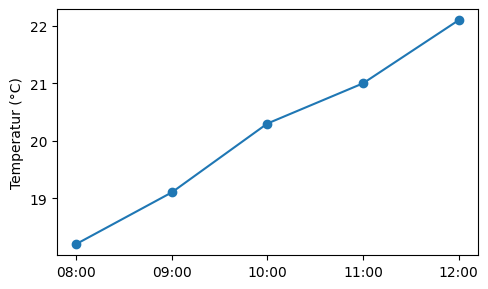

In [1]:
zeiten = ["08:00", "09:00", "10:00", "11:00", "12:00"]
temperaturen = [18.2, 19.1, 20.3, 21.0, 22.1]

# Einfache Tabelle (manuell)
for z, t in zip(zeiten, temperaturen):
    print(f"  {z}: {t} °C")

# Plot: matplotlib braucht numerische x-Werte
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
plt.plot(range(len(temperaturen)), temperaturen, "o-")
plt.xticks(range(5), zeiten)
plt.ylabel("Temperatur (°C)")
plt.tight_layout()
plt.show()

**Oder als Dictionary:**

  08:00: 18.2 °C
  09:00: 19.1 °C
  10:00: 20.3 °C
  11:00: 21.0 °C
  12:00: 22.1 °C


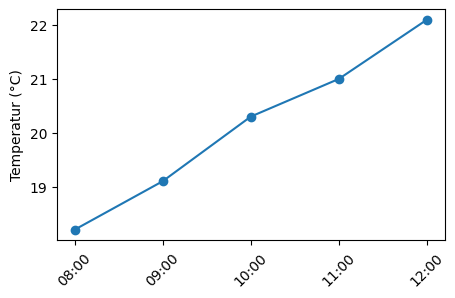

In [2]:
zeitreihe_dict = {
    "08:00": 18.2, "09:00": 19.1, "10:00": 20.3,
    "11:00": 21.0, "12:00": 22.1,
}

# Tabelle
for z, t in zeitreihe_dict.items():
    print(f"  {z}: {t} °C")

# Plot
import matplotlib.pyplot as plt
zeiten = list(zeitreihe_dict.keys())
werte = list(zeitreihe_dict.values())
plt.figure(figsize=(5, 3))
plt.plot(zeiten, werte, "o-")
plt.xticks(rotation=45)
plt.ylabel("Temperatur (°C)")
plt.show()

```{admonition} Problem
:class: attention

Bei Sortierung, Interpolation, Mittelwertbildung oder Export nach CSV müssen Sie alles selbst programmieren. Die Listen/Dicts bleiben „dumm“ – sie kennen ihren Zweck nicht.
```


Zeitreihen, Tabellen, Matrizen und ähnliche Strukturen kommen im Ingenieursalltag ständig vor. Damit man nicht immer wieder vor der Frage steht „Was soll ich tun?“, verwendet man in der Programmierpraxis bekannte, weit verbreitete Bibliotheken mit passenden Datentypen . 

Eine nicht vollständige Übersicht ist in der folgenden Tabelle gezeigt: 

| Struktur | Beispiel im Ingenieurkontext | Typischer Datentyp |
|----------|------------------------------|--------------------|
| Zeitreihen | Sensorwerte, Messungen über Zeit, Logs | `pandas.DataFrame`, `pandas.Series` |
| Tabellen | Versuchsdaten, Kataloge, Stücklisten, Parameter | `pandas.DataFrame` |
| Vektoren | Messwerte, Koeffizienten, Ortsvektoren | `numpy.ndarray` |
| Matrizen | Steifigkeitsmatrizen, Bilder, Rasterdaten | `numpy.ndarray` |

**pandas.DataFrame** – passend für tabellarische Daten und Zeitreihen:

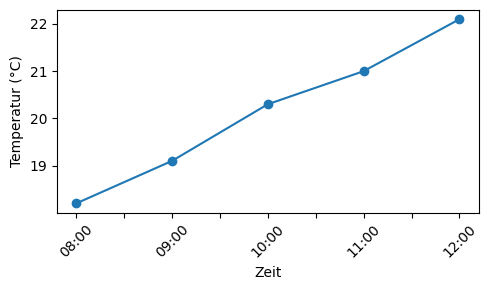

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "Zeit": ["08:00", "09:00", "10:00", "11:00", "12:00"],
    "Temperatur": [18.2, 19.1, 20.3, 21.0, 22.1]
})

# Tabelle
df

# Plot direkt aus dem DataFrame
df.plot(x="Zeit", y="Temperatur", kind="line", marker="o", figsize=(5, 3), legend=False)
plt.ylabel("Temperatur (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**numpy.ndarray** – für numerische Vektoren und Matrizen:

Mittelwert: 20.14 °C, Std: 1.37 °C


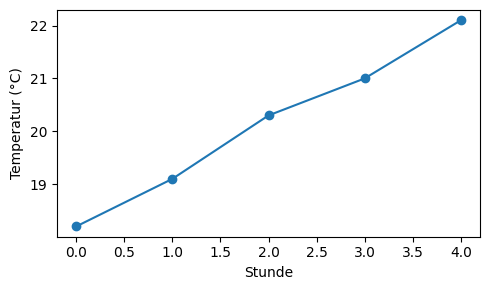

In [4]:
import numpy as np
import matplotlib.pyplot as plt

temperaturen = np.array([18.2, 19.1, 20.3, 21.0, 22.1])

# Statistik
print(f"Mittelwert: {np.mean(temperaturen):.2f} °C, Std: {np.std(temperaturen):.2f} °C")

# Plot
plt.figure(figsize=(5, 3))
plt.plot(temperaturen, "o-")
plt.ylabel("Temperatur (°C)")
plt.xlabel("Stunde")
plt.tight_layout()
plt.show()

Matrizen eignen sich z.B. dafür, **binäre Bilder** (Schwarz-Weiß) oder Rasterdaten darzustellen. Eine Matrix mit 0 und 1 kann mit `imshow` als Pixelbild gezeichnet werden:

Matrix (0 = dunkel, 1 = hell):
[[0 0 1 1 1 0 0]
 [0 1 0 0 0 1 0]
 [1 0 0 0 0 0 1]
 [1 1 1 1 1 1 1]
 [1 0 0 0 0 0 1]
 [1 0 0 0 0 0 1]]


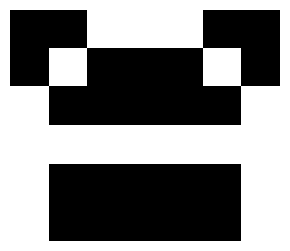

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Kleine binäre Matrix (0 = dunkel, 1 = hell) – z.B. ein einfaches Muster
muster = np.array([
    [0, 0, 1, 1, 1, 0, 0],
    [0, 1, 0, 0, 0, 1, 0],
    [1, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 1],
])

# Als Tabelle
print("Matrix (0 = dunkel, 1 = hell):")
print(muster)

# Als binäres Bild
plt.figure(figsize=(3, 3))
plt.imshow(muster, cmap="gray", vmin=0, vmax=1)
plt.axis("off")
plt.tight_layout()
plt.show()

```{admonition} Wichtig
:class: note

Es gibt Datenstrukturen wie Zeitreihen oder numerische Arrays, die in der Praxis sehr häufig genutzt werden, aber von Basis-Python nicht abgedeckt sind:
- in der Datenverarbeitung: `pandas.DataFrame` 
- in der numerischen Simulation: `numpy.ndarray`

Diese Datentypen sollten Sie zumindest vom Namen her kennen. In der Praxis treffen Sie sonst auf Verwirrung, wenn jemand z.B. eine Zeitreihe aus Listen oder Dicts aufbaut – das kostet Zeit, ist schwerer lesbar und oft fehleranfälliger als die passende Bibliothek zu nutzen.
```